In [79]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config Inline.Backend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

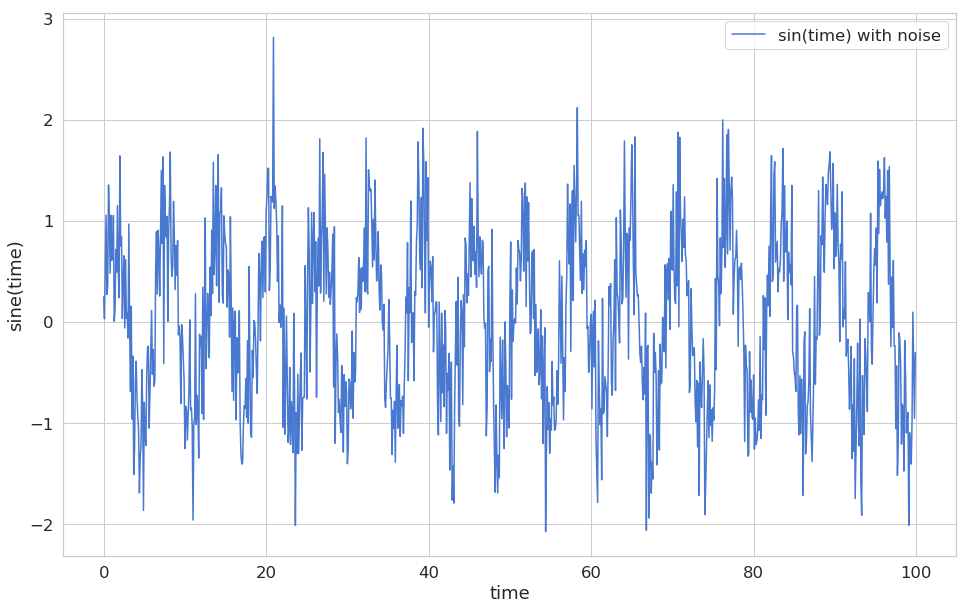

In [80]:
time = np.arange(0, 100, 0.1).round(decimals=3)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

plt.plot(time, sin, label='sin(time) with noise')
plt.xlabel('time')
plt.ylabel('sine(time)')
plt.legend()

In [81]:
# df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df = pd.DataFrame(sin, index=time, columns=['sine'])

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train, test = df.iloc[:train_size], df.iloc[train_size:]

print(len(train), len(test))

800 200


In [82]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i: i + time_steps].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [83]:
time_steps = 10
X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)
print(X_train.shape, y_train.shape)
X_train.shape[1], X_train.shape[2]

(790, 10, 1) (790,)


(10, 1)

In [89]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=2,
    input_dim=2,
    input_length=10,
#     input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.001)
)

model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 2)                 40        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 3         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1,
    shuffle=False
)

Train on 632 samples, validate on 158 samples
Epoch 1/50
632/632 [==============================] - 2s 3ms/sample - loss: 0.5545 - val_loss: 0.5614
Epoch 2/50
632/632 [==============================] - 0s 530us/sample - loss: 0.4403 - val_loss: 0.4467
Epoch 3/50
632/632 [==============================] - 0s 533us/sample - loss: 0.3739 - val_loss: 0.3965
Epoch 4/50
632/632 [==============================] - 0s 545us/sample - loss: 0.3522 - val_loss: 0.3815
Epoch 5/50
632/632 [==============================] - 0s 543us/sample - loss: 0.3448 - val_loss: 0.3729
Epoch 6/50
632/632 [==============================] - 0s 540us/sample - loss: 0.3395 - val_loss: 0.3657
Epoch 7/50
632/632 [==============================] - 0s 521us/sample - loss: 0.3349 - val_loss: 0.3594
Epoch 8/50
632/632 [==============================] - 0s 534us/sample - loss: 0.3308 - val_loss: 0.3538
Epoch 9/50
632/632 [==============================] - 0s 537us/sample - loss: 0.3273 - val_loss: 0.3488
Epoch 10/50
632/632 

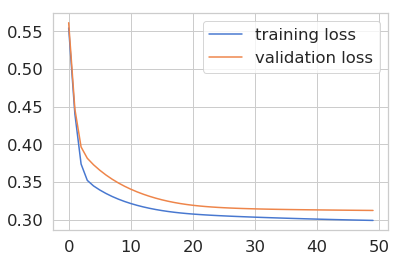

In [66]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

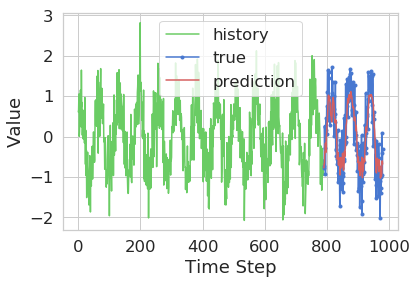

In [67]:
y_pred = model.predict(X_test)

plt.plot(np.arange(0, len(y_train)), y_train, 'g', label='history')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label='true')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label='prediction')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

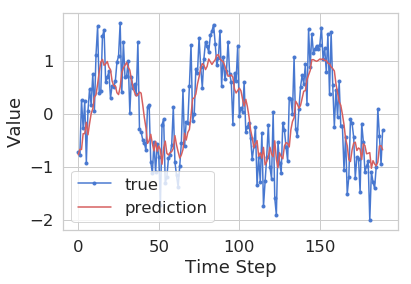

In [68]:
plt.plot(y_test, marker='.', label='true')
plt.plot(y_pred, 'r', label='prediction')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

